In [2]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
df = load_breast_cancer()

In [5]:
type(df)

sklearn.utils._bunch.Bunch

In [6]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
# df

In [8]:
df.data.shape

(569, 30)

In [9]:
df.target.shape

(569,)

In [10]:
df.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
len(df.feature_names)

30

In [12]:
df.target_names

array(['malignant', 'benign'], dtype='<U9')

In [13]:
# df.target

In [14]:
import pandas as pd
pd.DataFrame(df.target).value_counts()

1    357
0    212
dtype: int64

In [15]:
pd.DataFrame(df.target).value_counts(normalize=True)*100

1    62.741652
0    37.258348
dtype: float64

In [16]:
# import numpy as np
# np.unique(df.target)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(381, 30) (188, 30) (381,) (188,)


In [18]:
N, D = X_train.shape
# N = no of rows
# D = np of columns
print(N)
print(D)

381
30


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Build the model
# Way1
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Way2
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(100, input_shape=(D,), activation='relu'))
# model.add(tf.keras.layers.Dense(50, activation='relu'))
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [21]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 2s 30ms/step - loss: 0.5823 - accuracy: 0.7507 - val_loss: 0.3644 - val_accuracy: 0.9096
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.2652 - accuracy: 0.9449 - val_loss: 0.2111 - val_accuracy: 0.9309
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 0.1618 - accuracy: 0.9554 - val_loss: 0.1485 - val_accuracy: 0.9415
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.1188 - accuracy: 0.9633 - val_loss: 0.1161 - val_accuracy: 0.9574
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0965 - accuracy: 0.9764 - val_loss: 0.0978 - val_accuracy: 0.9468
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 0.0831 - accuracy: 0.9790 - val_loss: 0.0871 - val_accuracy: 0.9574
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0742 - accuracy: 0.9843 - val_loss: 0.0804 - val_accuracy: 0.9681
Epoch 8/100


In [23]:
# evaluate()

print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 4ms/step - loss: 6.5021e-04 - accuracy: 1.0000
Train score: [0.0006502137403003871, 1.0]
6/6 [==============================] - 0s 5ms/step - loss: 0.0361 - accuracy: 0.9947
Test score: [0.036128781735897064, 0.9946808218955994]


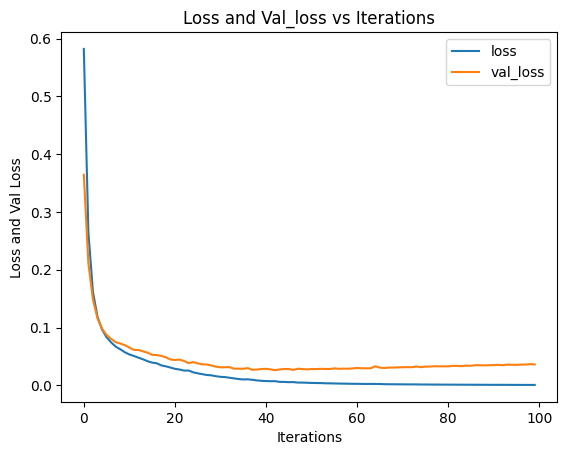

In [24]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("Loss and Val_loss vs Iterations", loc='center')
plt.ylabel("Loss and Val Loss")
plt.xlabel("Iterations")
plt.legend()
plt.show()

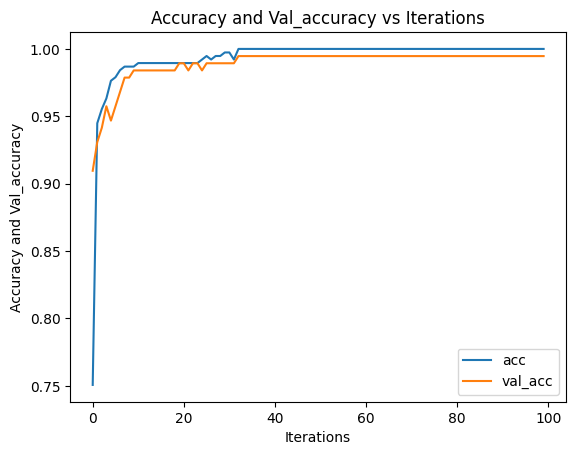

In [25]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.title("Accuracy and Val_accuracy vs Iterations", loc='center')
plt.ylabel("Accuracy and Val_accuracy")
plt.xlabel("Iterations")
plt.legend()
plt.show()

In [26]:
# Make predictions
y_pred = model.predict(X_test)
# print(y_pred)

6/6 [==============================] - 0s 7ms/step


In [27]:
import numpy as np
y_pred = np.round(y_pred).flatten()
y_pred

array([1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       0.], dtype=float32)

In [28]:
print("Manually calculated accuracy:", np.mean(y_pred == y_test))
print("Evaluate output accuracy:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9946808510638298
6/6 [==============================] - 0s 4ms/step - loss: 0.0361 - accuracy: 0.9947
Evaluate output accuracy: [0.036128781735897064, 0.9946808218955994]


# Model2

In [29]:
# Build the model
# Way1
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Way2
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(100, input_shape=(D,), activation='relu'))
# model.add(tf.keras.layers.Dense(50, activation='relu'))
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [30]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [31]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
12/12 [==============================] - 3s 57ms/step - loss: 0.5873 - accuracy: 0.6168 - val_loss: 0.3880 - val_accuracy: 0.9468
Epoch 2/10
12/12 [==============================] - 0s 17ms/step - loss: 0.2748 - accuracy: 0.9580 - val_loss: 0.2257 - val_accuracy: 0.9362
Epoch 3/10
12/12 [==============================] - 0s 22ms/step - loss: 0.1652 - accuracy: 0.9580 - val_loss: 0.1576 - val_accuracy: 0.9362
Epoch 4/10
12/12 [==============================] - 0s 20ms/step - loss: 0.1187 - accuracy: 0.9606 - val_loss: 0.1239 - val_accuracy: 0.9468
Epoch 5/10
12/12 [==============================] - 0s 17ms/step - loss: 0.0962 - accuracy: 0.9738 - val_loss: 0.1038 - val_accuracy: 0.9574
Epoch 6/10
12/12 [==============================] - 0s 23ms/step - loss: 0.0840 - accuracy: 0.9764 - val_loss: 0.0909 - val_accuracy: 0.9628
Epoch 7/10
12/12 [==============================] - 0s 12ms/step - loss: 0.0753 - accuracy: 0.9816 - val_loss: 0.0850 - val_accuracy: 0.9628
Epoch 8/10
12

In [32]:
# evaluate()

print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 3ms/step - loss: 0.0575 - accuracy: 0.9843
Train score: [0.05751051753759384, 0.9842519760131836]
6/6 [==============================] - 0s 12ms/step - loss: 0.0713 - accuracy: 0.9628
Test score: [0.0712738111615181, 0.9627659320831299]


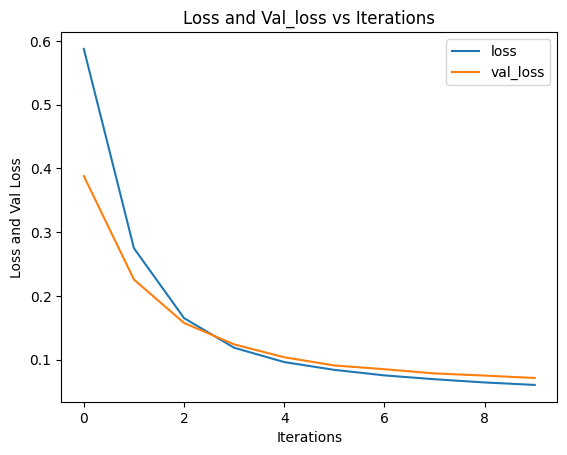

In [33]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("Loss and Val_loss vs Iterations", loc='center')
plt.ylabel("Loss and Val Loss")
plt.xlabel("Iterations")
plt.legend()
plt.show()

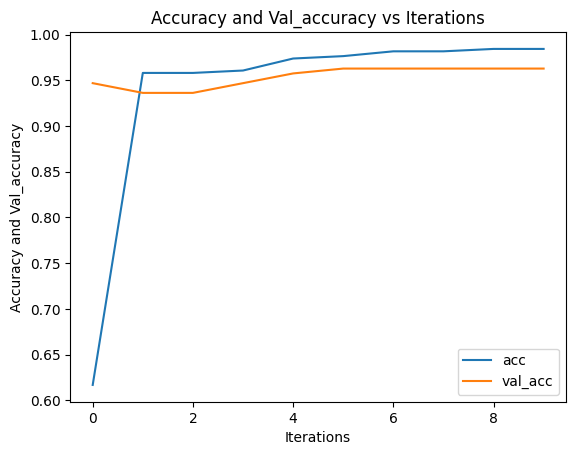

In [34]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.title("Accuracy and Val_accuracy vs Iterations", loc='center')
plt.ylabel("Accuracy and Val_accuracy")
plt.xlabel("Iterations")
plt.legend()
plt.show()

In [35]:
# Make predictions
y_pred = model.predict(X_test)
# print(y_pred)

6/6 [==============================] - 0s 12ms/step


In [36]:
import numpy as np
y_pred = np.round(y_pred).flatten()
y_pred

array([1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       0.], dtype=float32)

In [37]:
print("Manually calculated accuracy:", np.mean(y_pred == y_test))
print("Evaluate output accuracy:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9627659574468085
6/6 [==============================] - 0s 11ms/step - loss: 0.0713 - accuracy: 0.9628
Evaluate output accuracy: [0.0712738111615181, 0.9627659320831299]


# Model3

In [38]:
# Build the model
# Way1
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(100, activation='elu'),
    tf.keras.layers.Dense(50, activation='elu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Way2
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(100, input_shape=(D,), activation='elu'))
# model.add(tf.keras.layers.Dense(50, activation='elu'))
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [39]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [40]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
12/12 [==============================] - 5s 51ms/step - loss: 0.2320 - accuracy: 0.9318 - val_loss: 0.1371 - val_accuracy: 0.9415
Epoch 2/10
12/12 [==============================] - 0s 16ms/step - loss: 0.1030 - accuracy: 0.9685 - val_loss: 0.0913 - val_accuracy: 0.9628
Epoch 3/10
12/12 [==============================] - 0s 19ms/step - loss: 0.0839 - accuracy: 0.9711 - val_loss: 0.0772 - val_accuracy: 0.9628
Epoch 4/10
12/12 [==============================] - 0s 12ms/step - loss: 0.0768 - accuracy: 0.9790 - val_loss: 0.0702 - val_accuracy: 0.9628
Epoch 5/10
12/12 [==============================] - 0s 18ms/step - loss: 0.0719 - accuracy: 0.9790 - val_loss: 0.0661 - val_accuracy: 0.9734
Epoch 6/10
12/12 [==============================] - 0s 17ms/step - loss: 0.0681 - accuracy: 0.9816 - val_loss: 0.0617 - val_accuracy: 0.9787
Epoch 7/10
12/12 [==============================] - 0s 16ms/step - loss: 0.0655 - accuracy: 0.9816 - val_loss: 0.0606 - val_accuracy: 0.9787
Epoch 8/10
12

In [41]:
# evaluate()

print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 4ms/step - loss: 0.0560 - accuracy: 0.9843
Train score: [0.05597858503460884, 0.9842519760131836]
6/6 [==============================] - 0s 6ms/step - loss: 0.0544 - accuracy: 0.9787
Test score: [0.05442545935511589, 0.978723406791687]


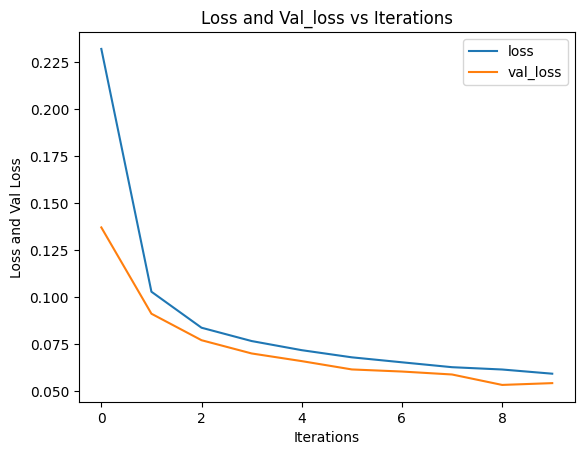

In [42]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("Loss and Val_loss vs Iterations", loc='center')
plt.ylabel("Loss and Val Loss")
plt.xlabel("Iterations")
plt.legend()
plt.show()

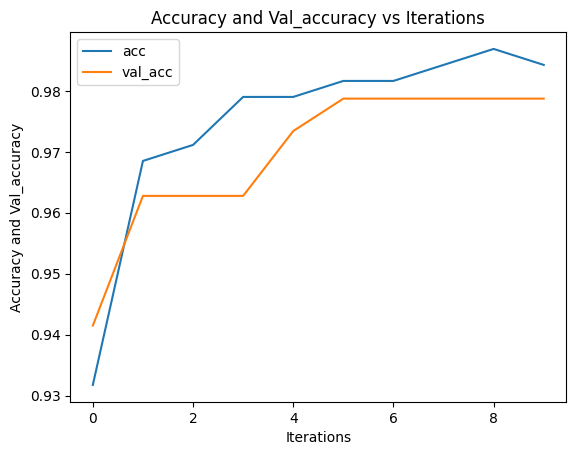

In [43]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.title("Accuracy and Val_accuracy vs Iterations", loc='center')
plt.ylabel("Accuracy and Val_accuracy")
plt.xlabel("Iterations")
plt.legend()
plt.show()

In [44]:
# Make predictions
y_pred = model.predict(X_test)
# print(y_pred)

6/6 [==============================] - 0s 3ms/step


In [45]:
import numpy as np
y_pred = np.round(y_pred).flatten()
y_pred

array([1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       0.], dtype=float32)

In [46]:
print("Manually calculated accuracy:", np.mean(y_pred == y_test))
print("Evaluate output accuracy:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9787234042553191
6/6 [==============================] - 0s 3ms/step - loss: 0.0544 - accuracy: 0.9787
Evaluate output accuracy: [0.05442545935511589, 0.978723406791687]


# Model4

In [47]:
# Build the model
# Way1
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(100, activation='LeakyReLU'),
    tf.keras.layers.Dense(50, activation='LeakyReLU'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Way2
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(100, input_shape=(D,), activation='relu'))
# model.add(tf.keras.layers.Dense(50, activation='relu'))
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [48]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [49]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
12/12 [==============================] - 1s 25ms/step - loss: 0.3968 - accuracy: 0.9003 - val_loss: 0.2394 - val_accuracy: 0.9362
Epoch 2/10
12/12 [==============================] - 0s 8ms/step - loss: 0.1692 - accuracy: 0.9528 - val_loss: 0.1493 - val_accuracy: 0.9468
Epoch 3/10
12/12 [==============================] - 0s 8ms/step - loss: 0.1157 - accuracy: 0.9659 - val_loss: 0.1109 - val_accuracy: 0.9628
Epoch 4/10
12/12 [==============================] - 0s 8ms/step - loss: 0.0932 - accuracy: 0.9764 - val_loss: 0.0928 - val_accuracy: 0.9734
Epoch 5/10
12/12 [==============================] - 0s 9ms/step - loss: 0.0814 - accuracy: 0.9790 - val_loss: 0.0837 - val_accuracy: 0.9681
Epoch 6/10
12/12 [==============================] - 0s 7ms/step - loss: 0.0743 - accuracy: 0.9816 - val_loss: 0.0780 - val_accuracy: 0.9628
Epoch 7/10
12/12 [==============================] - 0s 7ms/step - loss: 0.0688 - accuracy: 0.9816 - val_loss: 0.0728 - val_accuracy: 0.9681
Epoch 8/10
12/12 [=

In [50]:
# evaluate()

print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.0555 - accuracy: 0.9843
Train score: [0.055473629385232925, 0.9842519760131836]
6/6 [==============================] - 0s 4ms/step - loss: 0.0634 - accuracy: 0.9734
Test score: [0.06344900280237198, 0.9734042286872864]


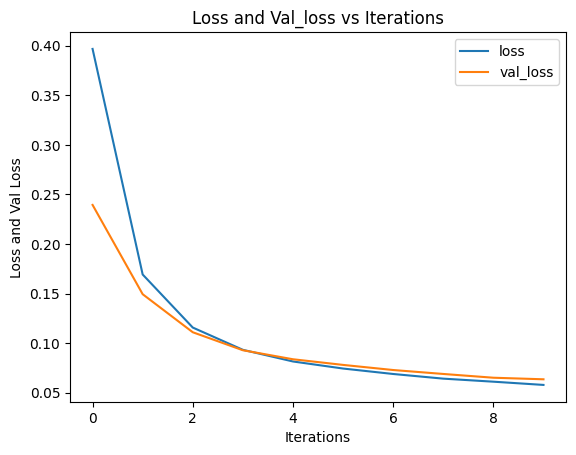

In [51]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("Loss and Val_loss vs Iterations", loc='center')
plt.ylabel("Loss and Val Loss")
plt.xlabel("Iterations")
plt.legend()
plt.show()

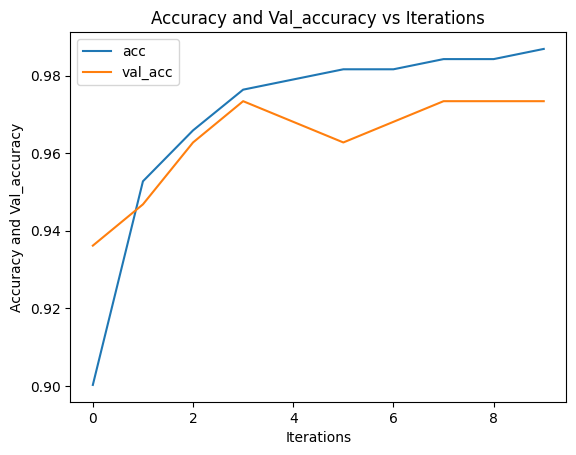

In [52]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.title("Accuracy and Val_accuracy vs Iterations", loc='center')
plt.ylabel("Accuracy and Val_accuracy")
plt.xlabel("Iterations")
plt.legend()
plt.show()

In [53]:
# Make predictions
y_pred = model.predict(X_test)
# print(y_pred)

6/6 [==============================] - 0s 3ms/step


In [54]:
import numpy as np
y_pred = np.round(y_pred).flatten()
y_pred

array([1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       0.], dtype=float32)

In [55]:
print("Manually calculated accuracy:", np.mean(y_pred == y_test))
print("Evaluate output accuracy:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.973404255319149
6/6 [==============================] - 0s 3ms/step - loss: 0.0634 - accuracy: 0.9734
Evaluate output accuracy: [0.06344900280237198, 0.9734042286872864]


# Model5

In [56]:
# Build the model
# Way1
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(256, activation='LeakyReLU'),
    tf.keras.layers.Dense(1024, activation='LeakyReLU'),
    tf.keras.layers.Dense(2048, activation='LeakyReLU'),
    tf.keras.layers.Dense(4096, activation='LeakyReLU'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Way2
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(100, input_shape=(D,), activation='relu'))
# model.add(tf.keras.layers.Dense(50, activation='relu'))
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [57]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [58]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
12/12 [==============================] - 8s 512ms/step - loss: 0.2634 - accuracy: 0.8950 - val_loss: 0.6611 - val_accuracy: 0.9415
Epoch 2/10
12/12 [==============================] - 3s 292ms/step - loss: 0.2208 - accuracy: 0.9633 - val_loss: 0.0663 - val_accuracy: 0.9681
Epoch 3/10
12/12 [==============================] - 4s 306ms/step - loss: 0.0752 - accuracy: 0.9738 - val_loss: 0.0794 - val_accuracy: 0.9734
Epoch 4/10
12/12 [==============================] - 4s 340ms/step - loss: 0.0496 - accuracy: 0.9869 - val_loss: 0.0623 - val_accuracy: 0.9681
Epoch 5/10
12/12 [==============================] - 6s 489ms/step - loss: 0.0412 - accuracy: 0.9843 - val_loss: 0.0663 - val_accuracy: 0.9840
Epoch 6/10
12/12 [==============================] - 4s 303ms/step - loss: 0.0281 - accuracy: 0.9895 - val_loss: 0.0699 - val_accuracy: 0.9840
Epoch 7/10
12/12 [==============================] - 3s 291ms/step - loss: 0.0207 - accuracy: 0.9921 - val_loss: 0.1094 - val_accuracy: 0.9734
Epoch 

In [59]:
# evaluate()

print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 1s 88ms/step - loss: 0.0340 - accuracy: 0.9921
Train score: [0.03398064523935318, 0.9921259880065918]
6/6 [==============================] - 1s 66ms/step - loss: 0.2490 - accuracy: 0.9787
Test score: [0.24904587864875793, 0.978723406791687]


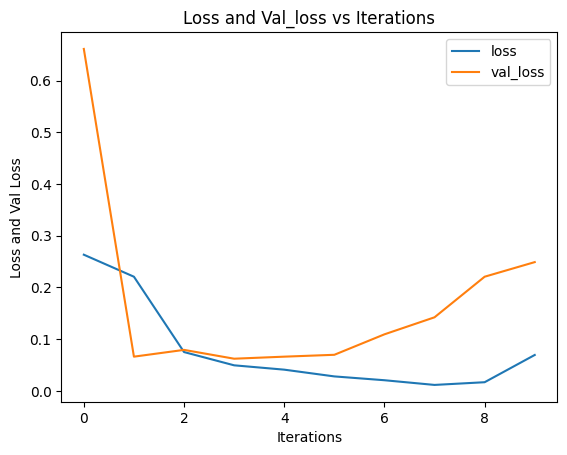

In [60]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("Loss and Val_loss vs Iterations", loc='center')
plt.ylabel("Loss and Val Loss")
plt.xlabel("Iterations")
plt.legend()
plt.show()

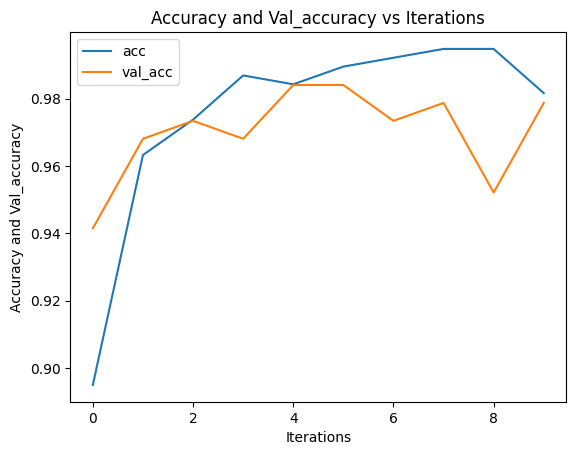

In [61]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.title("Accuracy and Val_accuracy vs Iterations", loc='center')
plt.ylabel("Accuracy and Val_accuracy")
plt.xlabel("Iterations")
plt.legend()
plt.show()

In [62]:
# Make predictions
y_pred = model.predict(X_test)
# print(y_pred)

6/6 [==============================] - 1s 94ms/step


In [63]:
import numpy as np
y_pred = np.round(y_pred).flatten()
y_pred

array([1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       0.], dtype=float32)

In [64]:
print("Manually calculated accuracy:", np.mean(y_pred == y_test))
print("Evaluate output accuracy:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9787234042553191
6/6 [==============================] - 0s 33ms/step - loss: 0.2490 - accuracy: 0.9787
Evaluate output accuracy: [0.24904587864875793, 0.978723406791687]


# Model6

In [65]:
# Build the model
# Way1
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(256, activation='LeakyReLU'),
    tf.keras.layers.Dense(1024, activation='LeakyReLU'),
    tf.keras.layers.Dense(2048, activation='LeakyReLU'),
    tf.keras.layers.Dense(4096, activation='LeakyReLU'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Way2
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(100, input_shape=(D,), activation='relu'))
# model.add(tf.keras.layers.Dense(50, activation='relu'))
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [66]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [67]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 5s 333ms/step - loss: 0.2648 - accuracy: 0.9108 - val_loss: 0.3250 - val_accuracy: 0.9628
Epoch 2/100
12/12 [==============================] - 8s 724ms/step - loss: 0.1459 - accuracy: 0.9633 - val_loss: 0.1945 - val_accuracy: 0.9628
Epoch 3/100
12/12 [==============================] - 9s 719ms/step - loss: 0.0825 - accuracy: 0.9711 - val_loss: 0.0705 - val_accuracy: 0.9681
Epoch 4/100
12/12 [==============================] - 3s 238ms/step - loss: 0.0489 - accuracy: 0.9869 - val_loss: 0.0746 - val_accuracy: 0.9734
Epoch 5/100
12/12 [==============================] - 3s 240ms/step - loss: 0.0344 - accuracy: 0.9869 - val_loss: 0.1319 - val_accuracy: 0.9894
Epoch 6/100
12/12 [==============================] - 3s 231ms/step - loss: 0.0247 - accuracy: 0.9895 - val_loss: 0.1776 - val_accuracy: 0.9840
Epoch 7/100
12/12 [==============================] - 4s 367ms/step - loss: 0.0226 - accuracy: 0.9869 - val_loss: 0.1618 - val_accuracy: 0.9787

In [68]:
# evaluate()

print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 1s 48ms/step - loss: 1.6381e-06 - accuracy: 1.0000
Train score: [1.6380569149987423e-06, 1.0]
6/6 [==============================] - 0s 49ms/step - loss: 0.1882 - accuracy: 0.9734
Test score: [0.1881811022758484, 0.9734042286872864]


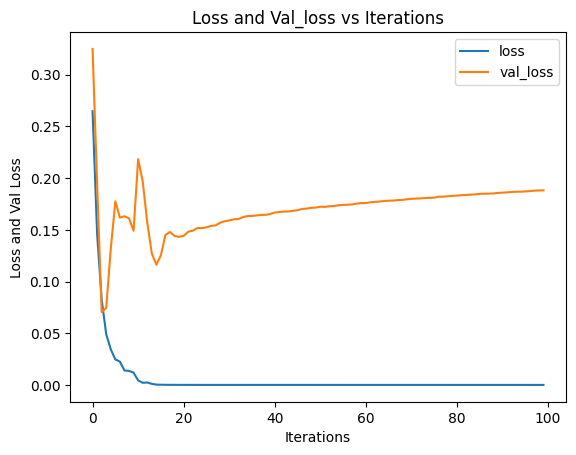

In [69]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("Loss and Val_loss vs Iterations", loc='center')
plt.ylabel("Loss and Val Loss")
plt.xlabel("Iterations")
plt.legend()
plt.show()

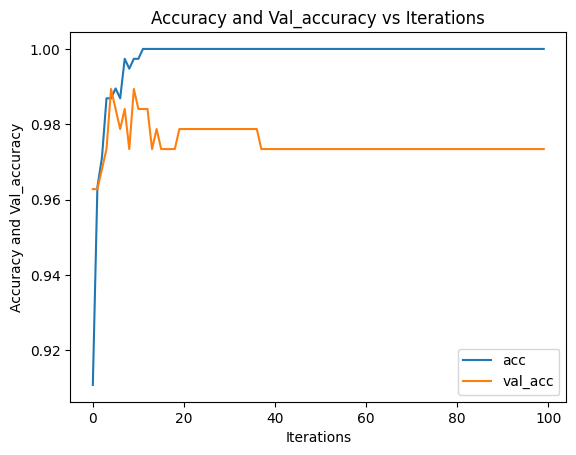

In [70]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.title("Accuracy and Val_accuracy vs Iterations", loc='center')
plt.ylabel("Accuracy and Val_accuracy")
plt.xlabel("Iterations")
plt.legend()
plt.show()

In [71]:
# Make predictions
y_pred = model.predict(X_test)
# print(y_pred)

6/6 [==============================] - 0s 44ms/step


In [72]:
import numpy as np
y_pred = np.round(y_pred).flatten()
y_pred

array([1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       0.], dtype=float32)

In [73]:
print("Manually calculated accuracy:", np.mean(y_pred == y_test))
print("Evaluate output accuracy:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.973404255319149
6/6 [==============================] - 0s 27ms/step - loss: 0.1882 - accuracy: 0.9734
Evaluate output accuracy: [0.1881811022758484, 0.9734042286872864]


# Happy Learning